In [3]:
# Chunk 1: Imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

# Add parent directory to path for imports
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
sys.path.append(str(project_root))

# Import the required classes
from aicons.definitions.zero import ZeroAIcon
from aicons.bayesbrainGPT.sensors.meta_s.meta_ads_sales_sensor import MetaAdsSalesSensor

/Users/infa/Library/Caches/pypoetry/virtualenvs/babel-PAVoc7qP-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create a ZeroAIcon instance
aicon = ZeroAIcon(
    name="context_analyzer",
    description="Analyzing context window distribution",
    model_name="gemini-1.5-flash"  # Using Flash for 1M token window
)

INFO:aicons.definitions.zero:Initialized context_analyzer with gemini-1.5-flash (context window: 1,000,000 tokens)
INFO:aicons.definitions.zero:Model description: Fast and versatile performance across a diverse variety of tasks


In [5]:
# Get the token usage report
usage_report = aicon.get_token_usage_report()
print(usage_report)

{'model': 'gemini-1.5-flash', 'context_window': 1000000, 'total_used': 0, 'remaining': 1000000, 'usage_percentage': 0.0, 'components': {'state_representation': {'tokens': 0, 'percentage': 0.0}, 'utility_function': {'tokens': 0, 'percentage': 0.0}, 'action_space': {'tokens': 0, 'percentage': 0.0}, 'inference': {'tokens': 0, 'percentage': 0.0}}}


In [6]:
# Add some sample data to fill the context
aicon.add_prior("sample_prior", {"mean": 0.5, "std": 0.1})
aicon.add_sensor("sample_sensor", lambda: {"data": "sample"})
aicon.update_posterior("sample_posterior", {"mean": 0.6, "std": 0.1})

In [7]:
usage_report = aicon.get_token_usage_report()

In [8]:
usage_report

{'model': 'gemini-1.5-flash',
 'context_window': 1000000,
 'total_used': 35,
 'remaining': 999965,
 'usage_percentage': 3.5e-05,
 'components': {'state_representation': {'tokens': 35, 'percentage': 3.5e-05},
  'utility_function': {'tokens': 0, 'percentage': 0.0},
  'action_space': {'tokens': 0, 'percentage': 0.0},
  'inference': {'tokens': 0, 'percentage': 0.0}}}

INFO:aicons.definitions.zero:Initialized context_analyzer with gemini-1.5-flash (context window: 1,000,000 tokens)
INFO:aicons.definitions.zero:Model description: Fast and versatile performance across a diverse variety of tasks


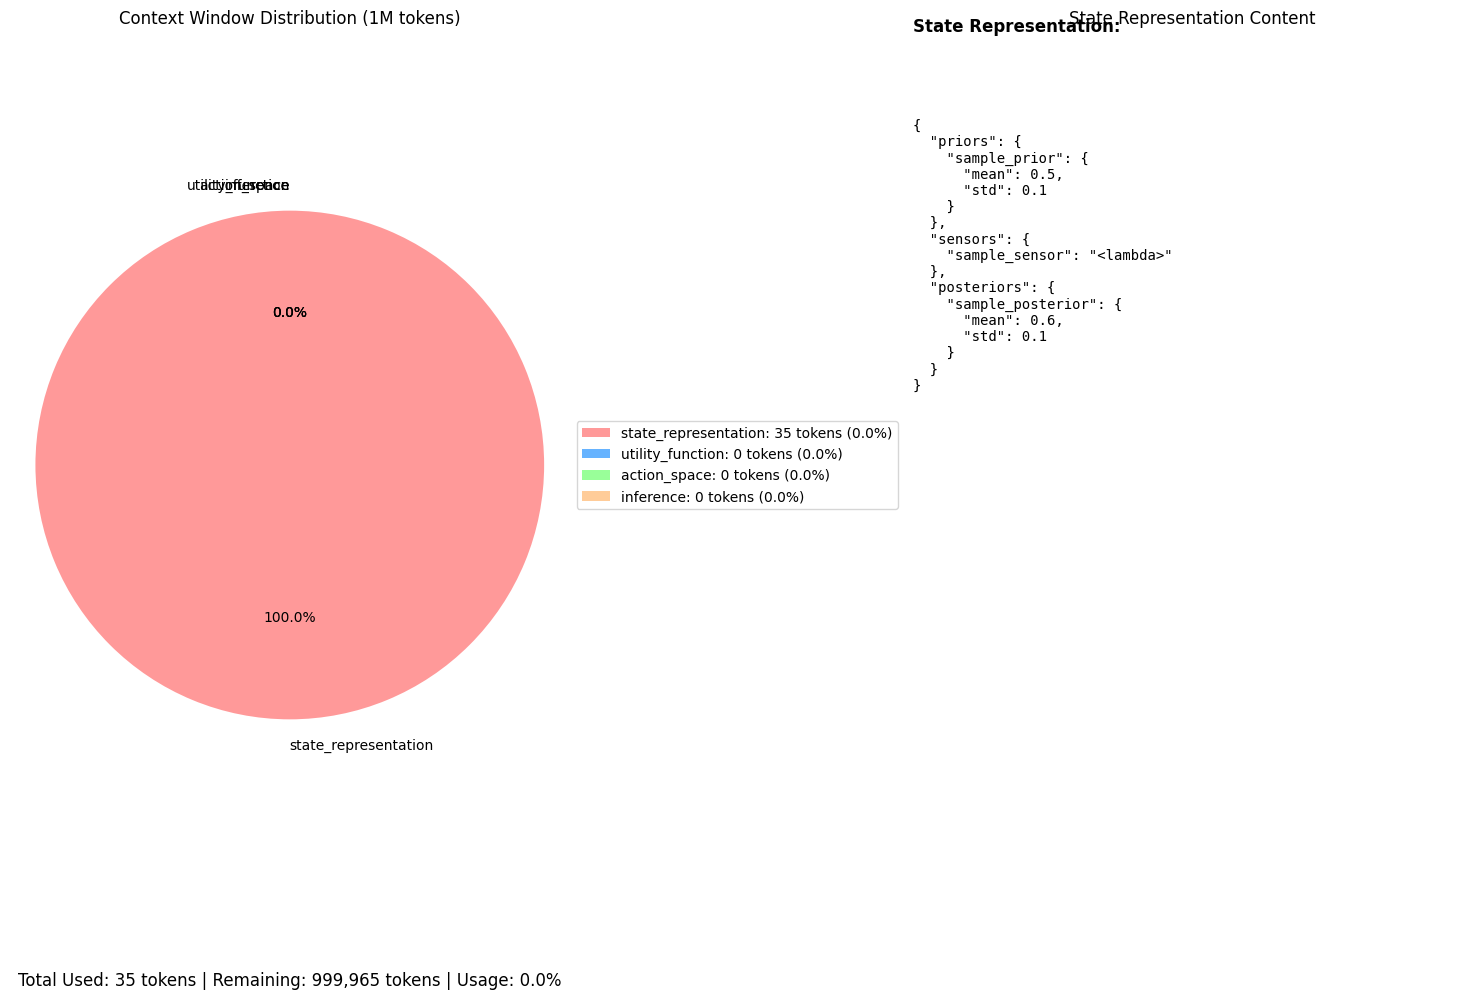


Detailed State Representation:
{
  "priors": {
    "sample_prior": {
      "mean": 0.5,
      "std": 0.1
    }
  },
  "sensors": {
    "sample_sensor": "<lambda>"
  },
  "posteriors": {
    "sample_posterior": {
      "mean": 0.6,
      "std": 0.1
    }
  }
}


In [9]:
# Import required libraries
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import json

# Add parent directory to path for imports
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
sys.path.append(str(project_root))

# Import ZeroAIcon
from aicons.definitions.zero import ZeroAIcon

# Create a ZeroAIcon instance
aicon = ZeroAIcon(
    name="context_analyzer",
    description="Analyzing context window distribution",
    model_name="gemini-1.5-flash"  # Using Flash for 1M token window
)

# Add some sample data to fill the context
aicon.add_prior("sample_prior", {"mean": 0.5, "std": 0.1})
aicon.add_sensor("sample_sensor", lambda: {"data": "sample"})
aicon.update_posterior("sample_posterior", {"mean": 0.6, "std": 0.1})

# Get the token usage report
usage_report = aicon.get_token_usage_report()

# Get the state representation
state_representation = aicon.get_state_representation()

# Create a figure with two subplots
fig = plt.figure(figsize=(15, 10))

# First subplot: Pie chart of context window distribution
ax1 = plt.subplot(121)
ax1.set_title("Context Window Distribution (1M tokens)")

# Extract data for visualization
components = usage_report["components"]
labels = list(components.keys())
sizes = [comp["tokens"] for comp in components.values()]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
ax1.legend(
    [f"{label}: {comp['tokens']:,} tokens ({comp['percentage']:.1%})" 
     for label, comp in components.items()],
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Add total tokens information
ax1.text(0.5, -0.1, 
        f"Total Used: {usage_report['total_used']:,} tokens | "
        f"Remaining: {usage_report['remaining']:,} tokens | "
        f"Usage: {usage_report['usage_percentage']:.1%}",
        ha='center', fontsize=12, transform=ax1.transAxes)

# Second subplot: State representation content
ax2 = plt.subplot(122)
ax2.set_title("State Representation Content")
ax2.axis('off')  # Turn off axis

# Format the state representation for display
state_text = json.dumps(json.loads(state_representation), indent=2)
ax2.text(0, 1, "State Representation:", fontsize=12, fontweight='bold')
ax2.text(0, 0.9, state_text, fontsize=10, family='monospace', va='top')

plt.tight_layout()
plt.show()

# Print the state representation in a more readable format
print("\nDetailed State Representation:")
print("=" * 50)
print(json.dumps(json.loads(state_representation), indent=2))
print("=" * 50)

------